# NVCL_KIT Downhole Mineral Plot Demonstration

*Acknowledgement: Borehole dataset courtesy of Mineral Resources Tasmania. (https://www.mrt.tas.gov.au/home)*

In [1]:
import io
import matplotlib.pyplot as plt
from PIL import Image
from nvcl_kit.reader import NVCLReader
from nvcl_kit.param_builder import param_builder
from nvcl_kit.constants import Scalar
from nvcl_kit.generators import gen_downhole_scalar_plots

**Build parameters**

In [2]:
param = param_builder('tas', max_boreholes=23)
if not param:
    print("Cannot build parameters for 'tas'")

**Initialise reader object**

In [3]:
reader = NVCLReader(param)
if not reader.wfs:
        print("ERROR!")

**Print WFS feature information from a borehole called 'ML041'**

In [4]:
feat_list = reader.filter_feat_list(name='ML048')
print(feat_list)


[namespace(boreholeLength_m='339.5', boreholeMaterialCustodian='MRT', description='', drillEndDate='', drillStartDate='1978-02-16', driller='Private Contractor', drillingMethod='Diamond', elevation_m='530.8', elevation_srs='http://www.opengis.net/def/crs/EPSG/0/5711', genericSymbolizer='', href='http://www.mrt.tas.gov.au/resource/feature/mrt/borehole/10350', inclinationType='inclined down', metadata_uri='http://researchdata.ands.org.au/geosciml-drillhole-locations-in-tasmania-d354a70a4a29536166ab8a9ca6470a79d628c05e', name='ML048', nvcl_id='10350', operator='Renison Ltd (Exploration)', parentBorehole_uri='', positionalAccuracy='', purpose='Metallic minerals', source='https://www.mrt.tas.gov.au/webdoc2/app/default/drilling_detail?id=10350', startPoint='unknown', status='unknown', x=145.32070134, y=-41.69823623, z=530.8)]


In [5]:
print(feat_list[0].nvcl_id)

10350


**Display downhole mineral plot**

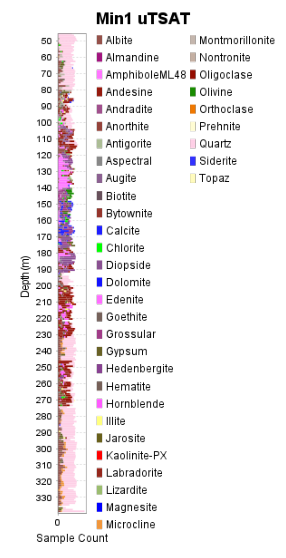

In [6]:
for nvcl_id, dataset_id, scalar_log, png in gen_downhole_scalar_plots(reader, nvcl_id_list=['10350']):
    image = Image.open(io.BytesIO(png))
    fig, ax = plt.subplots(figsize = (10, 10))
    ax.imshow(image)
    ax.axis('off')
    break